In [103]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import *
from skimage import io, color, filters, morphology


img_9 = io.imread('./Imagenes/prueba9.jpg')
img6 = io.imread('./Imagenes/prueba6.png')
img8 = io.imread('./Imagenes/prueba8.jpg')
img7 = io.imread('./Imagenes/prueba7.jpg')
img4 = io.imread('./Imagenes/prueba4.jpg')
img12 = io.imread('./Imagenes/prueba12.jpg')
img10 = io.imread('./Imagenes/prueba10.jpg')
img2 = io.imread('./Imagenes/prueba2.jpg')
img3 = io.imread('./Imagenes/prueba3.jpg')
img1= io.imread('./Imagenes/prueba1.jpg')

def show2imgs(img1, img2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    plt.show()


def calcular_rango_hsv2(img):

    
    valor_min = 0.2
    valor_max = 0.95
    mascara = (img[:,:,2] > valor_min) & (img[:,:,2] < valor_max)
    
    h = img[:,:,0][mascara]
    s = img[:,:,1][mascara]
    
    h_min, h_max = np.percentile(h, [5, 95])
    s_min, s_max = np.percentile(s, [5, 95])
    
    h_rango = 0.1 
    s_rango = 0.2  
    
    lower_h = max(0, h_min - h_rango)
    upper_h = min(1, h_max + h_rango)
    lower_s = max(0, s_min - s_rango)
    upper_s = min(1, s_max + s_rango)
   
    lower_hsv = np.array([lower_h, lower_s, valor_min])
    upper_hsv = np.array([upper_h, upper_s, valor_max])
    
    return lower_hsv, upper_hsv

def convertirAutomatico2(imgEx):
    hsv = color.rgb2hsv(imgEx)
    
    lower_blue, upper_blue = calcular_rango_hsv2(hsv)

    mask = ((hsv[:, :, 0] < lower_blue[0]) | (hsv[:, :, 0] > upper_blue[0]) |
        (hsv[:, :, 1] < lower_blue[1]) | (hsv[:, :, 1] > upper_blue[1]) |
        (hsv[:, :, 2] < lower_blue[2]) | (hsv[:, :, 2] > upper_blue[2]))


    result = np.zeros_like(imgEx)
    result[mask] = imgEx[mask]
    
    return result

def procesar_imagen(img):
    
    img_sin_agua = convertirAutomatico2(img)
    
    img_gray_sin_agua = color.rgb2gray(img_sin_agua)
    
    img_smooth = filters.gaussian(img_gray_sin_agua, sigma=2)

    thresh = filters.threshold_li(img_smooth)
    binary = img_smooth > thresh

    binary = morphology.remove_small_objects(binary, min_size=2000, connectivity=2)
    binary = morphology.remove_small_holes(binary, area_threshold=1000)

    num_channels = img.shape[2]

    resultado = img.copy()
    resultado[:, :, :num_channels] = np.multiply(img[:, :, :num_channels], np.dstack([binary]))

    return resultado




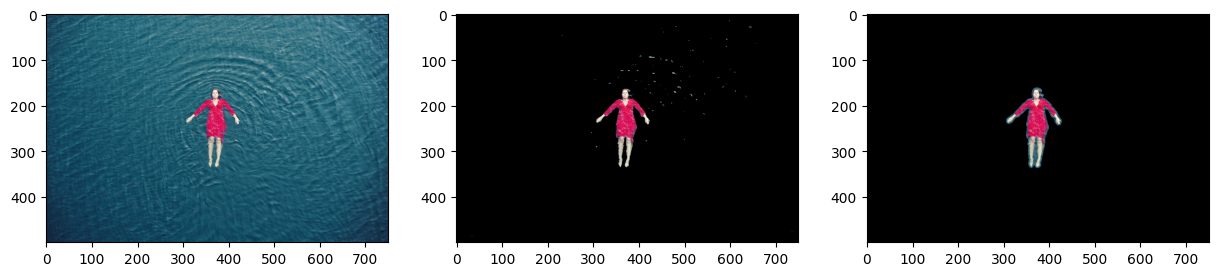

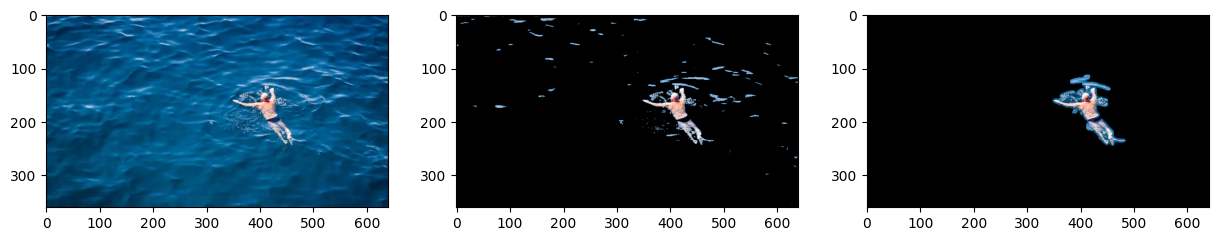

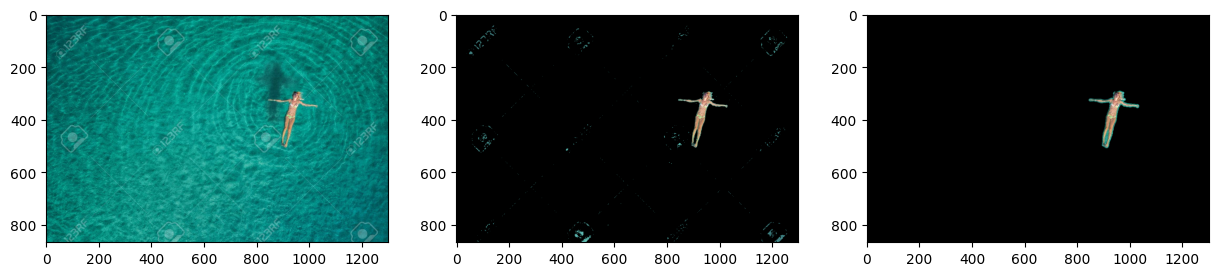

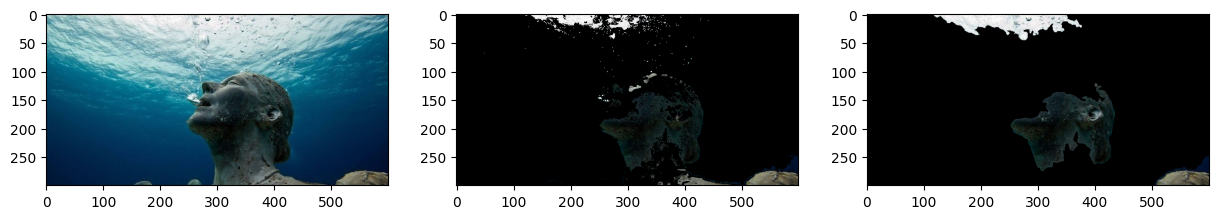

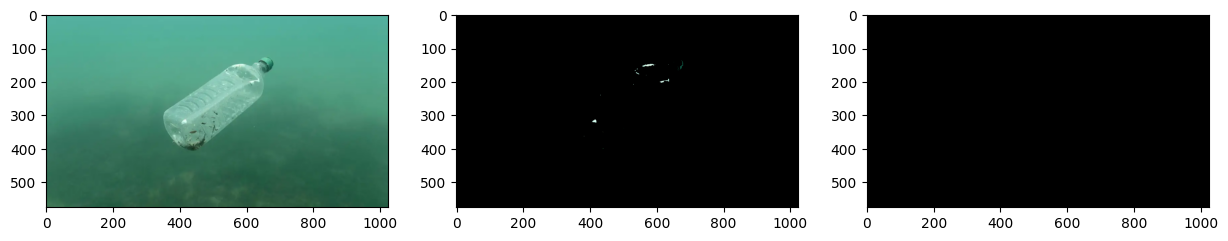

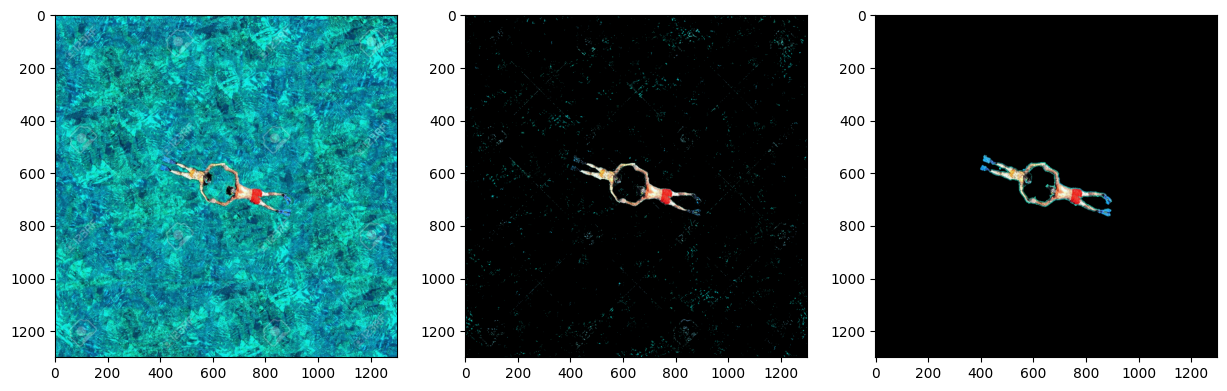

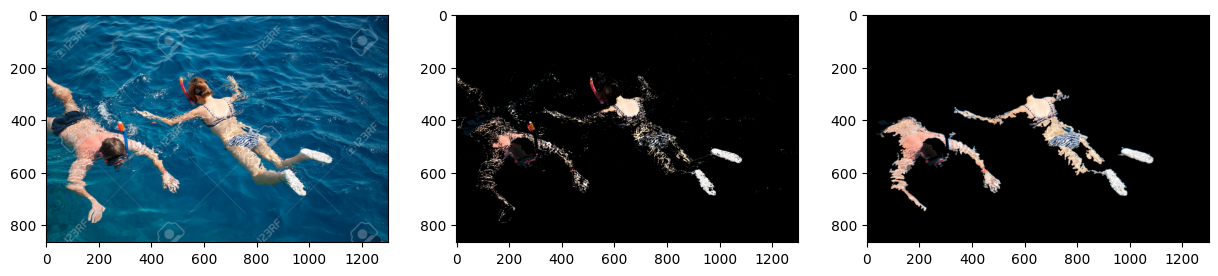

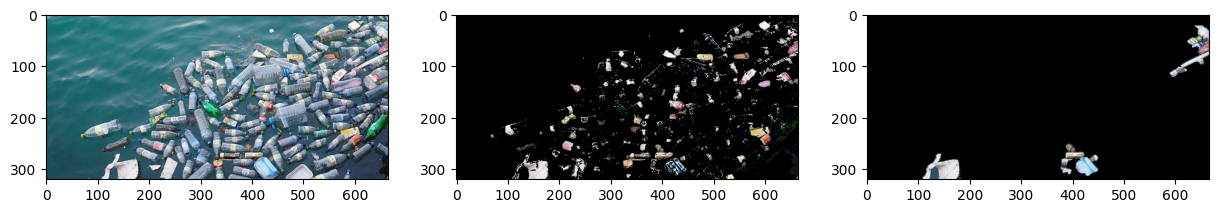

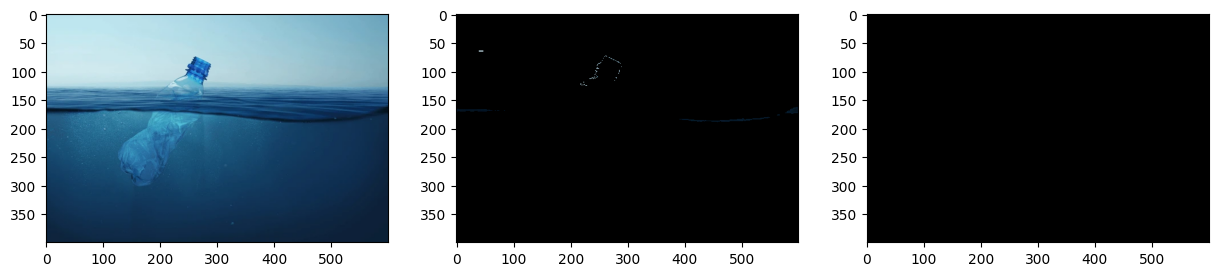

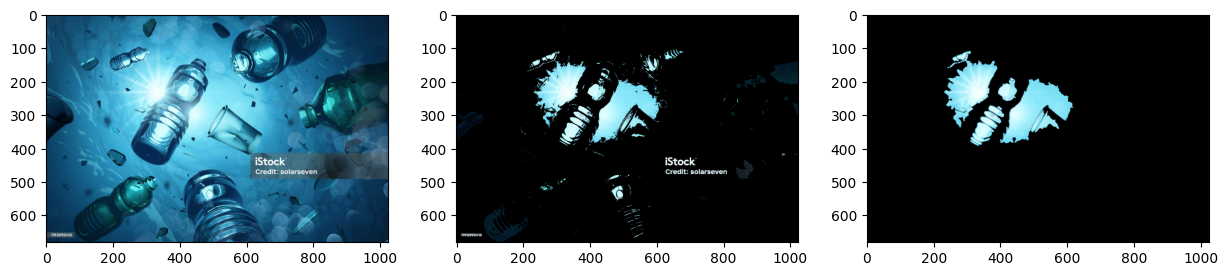

In [105]:
def show3imgs(img1, img2, img3):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    ax[2].imshow(img3)
    plt.show()

show3imgs(img_9,convertirAutomatico2(img_9), procesar_imagen(img_9))
show3imgs(img6,convertirAutomatico2(img6), procesar_imagen(img6))
show3imgs(img8,convertirAutomatico2(img8), procesar_imagen(img8))
show3imgs(img7,convertirAutomatico2(img7), procesar_imagen(img7))
show3imgs(img4,convertirAutomatico2(img4), procesar_imagen(img4))
show3imgs(img12,convertirAutomatico2(img12), procesar_imagen(img12))
show3imgs(img10,convertirAutomatico2(img10), procesar_imagen(img10))
show3imgs(img2,convertirAutomatico2(img2), procesar_imagen(img2))
show3imgs(img3,convertirAutomatico2(img3), procesar_imagen(img3))
show3imgs(img1,convertirAutomatico2(img1), procesar_imagen(img1))




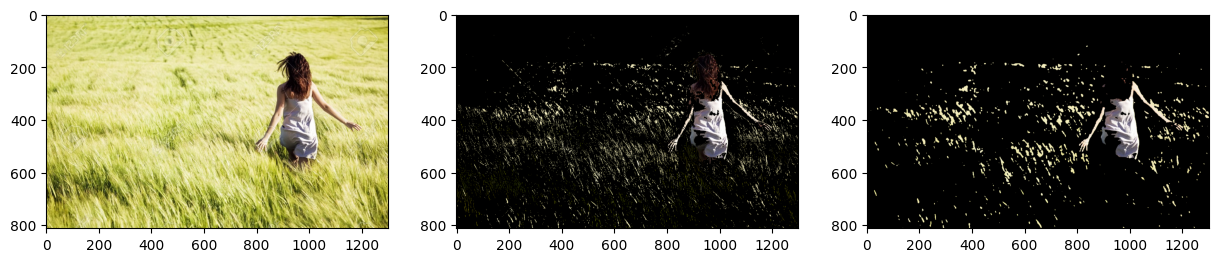

In [53]:
img13 = io.imread('./Imagenes/prueba13.jpg')

show3imgs(img13,convertirAutomatico2(img13), procesar_imagen(img13))

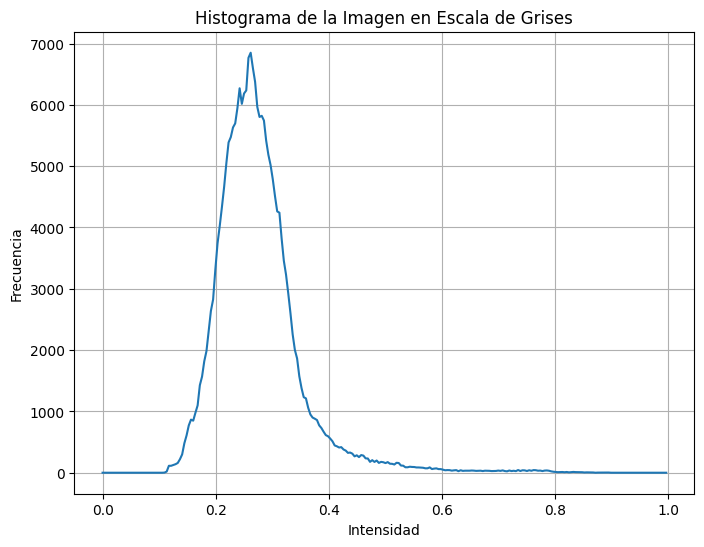

In [71]:
img6gray = color.rgb2gray(img6)
img6gray = filters.gaussian(img6gray, sigma=2)
hist, bins = np.histogram(img6gray, bins=256, range=(0, 1))

# Mostrar el histograma
plt.figure(figsize=(8, 6))
plt.plot(bins[:-1], hist)  # Graficar el histograma
plt.title('Histograma de la Imagen en Escala de Grises')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()